# Script to generate and publish an audio podacast


In [ ]:
!pip install -U langchain-anthropic
!pip install python-docx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 8.0 MB/s eta 0:00:00


Anthropic models

In [27]:
import os
from langchain import PromptTemplate, LLMChain
from langchain_anthropic import ChatAnthropic
from google.colab import userdata
from docx import Document

# Set up your Anthropic API key
os.environ["ANTHROPIC_API_KEY"] = userdata.get('amithash_anthropic')

# Define the mental models you want to generate transcripts for
mental_models = [
    "Flypaper Theory",
    "Inversion",
    "Second-Order Thinking"
]

# Define the transcript template without titles and with breaks
transcript_template = """
Welcome to Mental Models Daily, where we explore one mental model each day to help you elevate your daily decision making. Today, we're diving into a fascinating concept: {model_name}.

<break time="1s" />

{introduction}

{explanation}

<break time="1.3s" />

{historical_example}

<break time="1.3s" />

{business_example}

<break time="1.3s" />

{daily_life_applications}

{conclusion}

{sign_off}
"""

# Define the prompt template
prompt = PromptTemplate(
    input_variables=[
        "model_name",
        "model_name_lower",
        "introduction",
        "explanation",
        "historical_example",
        "business_example",
        "daily_life_applications",
        "conclusion",
        "sign_off"
    ],
    template=transcript_template
)

# Initialize ChatAnthropic with specified parameters, including model_name
llm = llm = ChatAnthropic(
    model="claude-3-5-sonnet-latest",
    temperature=0,
    max_tokens=1024,
    timeout=None,
    max_retries=2,
    # api_key="...",
    # base_url="...",
    # other params...
)
llm_chain = LLMChain(prompt=prompt, llm=llm)

# Generate transcripts in a loop for each mental model and save to Word document
for model in mental_models:
    model_name_lower = model.lower().replace(" ", "-")
    transcript = llm_chain.run({
        "model_name": model,
        "model_name_lower": model_name_lower,
        "introduction": f"Welcome to Mental Models Daily, where we explore one mental model each day to help you elevate your daily decision making. Today, we're diving into a fascinating concept: {model}.",
        "explanation": f"This model involves [explanation details about the {model} mental model].",
        "historical_example": f"A historical example of {model} would be [historical example details].",
        "business_example": f"In the business world, {model} can be seen in [modern business example details].",
        "daily_life_applications": f"""
        Firstly, you can apply the {model} mental model in daily life by [application detail 1].

        Secondly, another approach is to [application detail 2].

        Finally, consider applying {model} in situations where [application detail 3].
        """,
        "conclusion": f"In conclusion, the {model} mental model teaches us to [conclusion summary].",
        "sign_off": f"Thank you for tuning in to today's episode on {model}. Until next time, may your thoughts be sharp, your actions deliberate, and your understanding of mental models ever deeper. For more insights, visit mentalmodelsdaily.com or follow us on X or Instagram."
    })

    # Print transcript
    print(f"Transcript for {model}:\n{transcript}\n")

    # Create a Word document and add the transcript
    doc = Document()
    doc.add_paragraph(transcript)

    # Save the Word document
    file_name = f"{model_name_lower}_transcript.docx"
    doc.save(file_name)
    print(f"Transcript saved to {file_name}\n")


Transcript for Flypaper Theory:
Let me help you complete this script about Flypaper Theory.

Welcome to Mental Models Daily, where we explore one mental model each day to help you elevate your daily decision making. Today, we're diving into a fascinating concept: Flypaper Theory.

This model suggests that resources tend to stick where they first land, much like flies on flypaper. In organizations or systems, money, time, and effort often remain where they're initially allocated, regardless of changing needs or better alternatives.

<break time="1.3s" />

A historical example of Flypaper Theory would be the continued funding of obsolete military programs during the Cold War, where budgets remained stuck in existing projects even when strategic needs had changed.

<break time="1.3s" />

In the business world, Flypaper Theory can be seen in companies maintaining legacy systems or continuing inefficient processes simply because "that's where the resources have always been allocated," rathe

In [2]:
import os
import requests
from google.colab import userdata

# Set up Eleven Labs API key
ELEVEN_LABS_API_KEY = userdata.get('amithash_elevenlabs')  # Replace with your API key

# API endpoint and voice ID for Chris Brift with the Eleven Multilingual v2 model
ELEVEN_LABS_API_URL = "https://api.elevenlabs.io/v1/text-to-speech"
VOICE_ID = "UEKYgullGqaF0keqT8Bu"  # Replace with the specific voice ID for Chris Brift

# Parameters for audio synthesis
stability = 0.5          # Stability set to 50%
similarity_boost = 0.7   # Similarity boost set to 70%
style_exaggeration = 5   # Style exaggeration set to 5%

def convert_text_to_audio(text, filename):
    headers = {
        "Accept": "audio/mpeg",
        "Content-Type": "application/json",
        "xi-api-key": ELEVEN_LABS_API_KEY
    }
    payload = {
        "text": text,
        "voice_settings": {
            "stability": stability,
            "similarity_boost": similarity_boost,
            "style_exaggeration": style_exaggeration
        }
    }

    # Send request to Eleven Labs API
    response = requests.post(f"{ELEVEN_LABS_API_URL}/{VOICE_ID}", headers=headers, json=payload)

    # Check for errors
    if response.status_code == 200:
        # Save audio file
        with open(filename, "wb") as f:
            f.write(response.content)
        print(f"Audio saved to {filename}")
    else:
        print(f"Failed to generate audio: {response.status_code} - {response.text}")

# Example usage: Convert each transcript to audio
mental_models = ["Flypaper Theory", "Inversion", "Second-Order Thinking"]
transcripts = {
    "Flypaper Theory": "Welcome to Mental Models Daily, where we explore one mental model each day...",
    "Inversion": "Today, we're diving into the mental model of Inversion...",
    "Second-Order Thinking": "Let’s talk about Second-Order Thinking, a key concept for foresight..."
}

for model, transcript in transcripts.items():
    audio_filename = f"{model.lower().replace(' ', '_')}_audio.mp3"
    convert_text_to_audio(transcript, audio_filename)


Audio saved to flypaper_theory_audio.mp3
Audio saved to inversion_audio.mp3
Audio saved to second-order_thinking_audio.mp3


Mixing audio

In [6]:
!pip install librosa matplotlib pydub numpy


Silence gaps (in minutes and seconds):
Gap 1: Start = 0m 7s, End = 0m 9s, Duration = 2.394
Gap 2: Start = 0m 15s, End = 0m 17s, Duration = 1.971
Gap 3: Start = 0m 23s, End = 0m 25s, Duration = 1.798
Gap 4: Start = 0m 40s, End = 0m 41s, Duration = 1.441
Gap 5: Start = 0m 49s, End = 0m 52s, Duration = 2.155
Gap 6: Start = 0m 58s, End = 0m 59s, Duration = 1.605
Gap 7: Start = 1m 23s, End = 1m 24s, Duration = 1.42
Gap 8: Start = 1m 30s, End = 1m 33s, Duration = 2.804
Gap 9: Start = 1m 42s, End = 1m 43s, Duration = 1.792
Gap 10: Start = 2m 11s, End = 2m 13s, Duration = 2.08
Gap 11: Start = 2m 17s, End = 2m 19s, Duration = 2.542
Gap 12: Start = 2m 23s, End = 2m 25s, Duration = 1.849
Gap 13: Start = 2m 33s, End = 2m 35s, Duration = 1.621
Gap 14: Start = 3m 2s, End = 3m 4s, Duration = 2.308
Gap 15: Start = 3m 9s, End = 3m 11s, Duration = 1.822
Gap 16: Start = 3m 27s, End = 3m 29s, Duration = 2.04
Gap 17: Start = 3m 54s, End = 3m 56s, Duration = 2.233
Gap 18: Start = 4m 5s, End = 4m 7s, Duratio

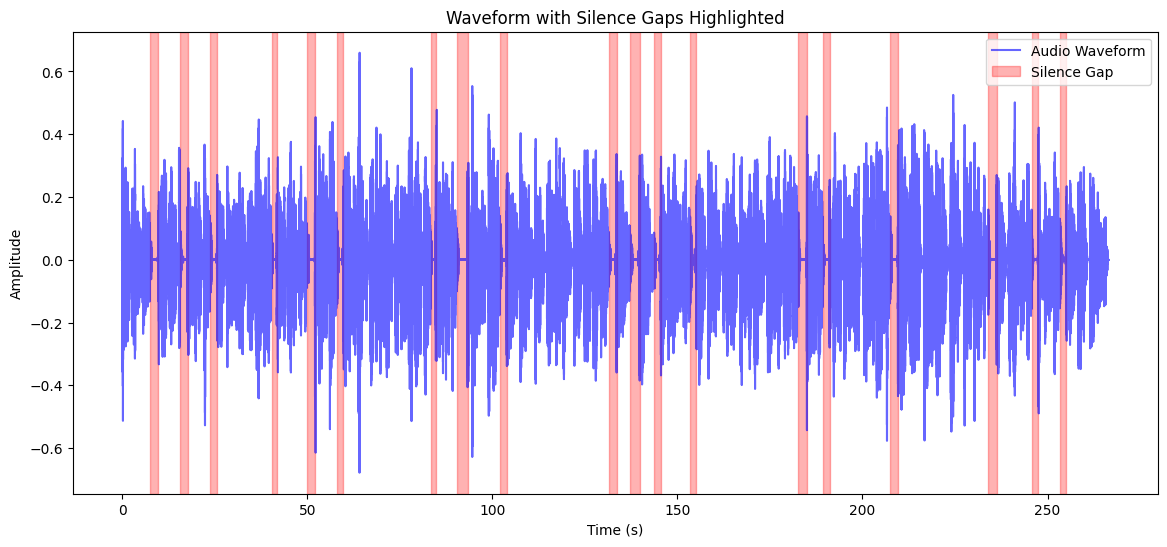

In [11]:
import librosa
import matplotlib.pyplot as plt
from pydub import AudioSegment, silence
import numpy as np

# Convert silence segments from milliseconds to minutes and seconds
def format_time(milliseconds):
    seconds = milliseconds / 1000
    minutes = int(seconds // 60)
    seconds = int(seconds % 60)
    return f"{minutes}m {seconds}s"

def plot_waveform_with_gaps(audio_path, silence_duration=1000, silence_thresh=-40):
    """
    Plots the waveform of an audio file and highlights silence gaps longer than the specified duration.

    Parameters:
    - audio_path (str): Path to the audio file.
    - silence_duration (int): Minimum silence duration to detect in milliseconds (default is 1000ms = 1s).
    - silence_thresh (int): Silence threshold in dB (lower = more sensitive).
    """

    # Load audio with pydub and detect silences
    audio = AudioSegment.from_file(audio_path)
    silent_segments = silence.detect_silence(audio, min_silence_len=silence_duration, silence_thresh=silence_thresh)

    # Print silence segments in minutes and seconds
    print("Silence gaps (in minutes and seconds):")
    for i, (start, end) in enumerate(silent_segments):
        start_formatted = format_time(start)
        end_formatted = format_time(end)
        duration = (end - start)/1000
        print(f"Gap {i+1}: Start = {start_formatted}, End = {end_formatted}, Duration = {duration}")

    # Load audio with librosa for waveform plotting
    y, sr = librosa.load(audio_path, sr=None)
    duration = librosa.get_duration(y=y, sr=sr)
    time_axis = np.linspace(0, duration, len(y))

    # Plot the waveform
    plt.figure(figsize=(14, 6))
    plt.plot(time_axis, y, color="b", alpha=0.6, label="Audio Waveform")
    plt.title("Waveform with Silence Gaps Highlighted")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    # Highlight detected silent segments
    for start, end in silent_segments:
        plt.axvspan(start / 1000, end / 1000, color='red', alpha=0.3, label="Silence Gap" if start == silent_segments[0][0] else "")

    # Adding legend only once for silence gaps
    plt.legend(loc="upper right")
    plt.show()

# Example usage
audio_file_path = "Quarantine.mp3"  # Replace with your audio file path
plot_waveform_with_gaps(audio_file_path, silence_duration=1300, silence_thresh=-40)


In [9]:
from pydub import AudioSegment

def overlay_audio_with_timestamps(
    intro_path, original_path, transition1_path, transition2_path, outro_path,
    intro_start, original_start, transition1_start_1, transition2_start, transition1_start_2, outro_start
):
    """
    Overlays multiple audio clips at specified timestamps on an original audio file.

    Parameters:
    - intro_path (str): Path to the intro audio file.
    - original_path (str): Path to the original audio file.
    - transition1_path (str): Path to the first transition audio file.
    - transition2_path (str): Path to the second transition audio file.
    - outro_path (str): Path to the outro audio file.
    - intro_start (int): Start time for the intro in milliseconds.
    - original_start (int): Start time for the original audio in milliseconds.
    - transition1_start_1 (int): First start time for transition1 in milliseconds.
    - transition2_start (int): Start time for transition2 in milliseconds.
    - transition1_start_2 (int): Second start time for transition1 in milliseconds.
    - outro_start (int): Start time for the outro in milliseconds.
    """

    # Load the audio files
    intro = AudioSegment.from_file(intro_path)
    original = AudioSegment.from_file(original_path)
    transition1 = AudioSegment.from_file(transition1_path)
    transition2 = AudioSegment.from_file(transition2_path)
    outro = AudioSegment.from_file(outro_path)

    # Step 1: Start with intro, then overlay the original at original_start
    base_audio = intro.overlay(original, position=original_start)

    # Step 2: Overlay transition1 at specified position
    base_audio = base_audio.overlay(transition1, position=transition1_start_1)

    # Step 3: Overlay transition2 at specified position
    base_audio = base_audio.overlay(transition2, position=transition2_start)

    # Step 4: Overlay transition1 again at another specified position
    base_audio = base_audio.overlay(transition1, position=transition1_start_2)

    # Step 5: Overlay outro at specified position, allowing it to extend beyond the end
    base_audio = base_audio.overlay(outro, position=outro_start)

    # Export the final audio
    base_audio.export("final_audio.mp3", format="mp3")
    print("Final audio saved as 'final_audio.mp3'")

# Define the file paths and timestamps
intro_path = "intro.mp3"
original_path = "original.mp3"
transition1_path = "transition1.mp3"
transition2_path = "transition2.mp3"
outro_path = "outro.mp3"

# Define timestamps (in milliseconds)
intro_start = 0  # Intro starts at the beginning
original_start = 5 * 1000  # 5 seconds into the intro
transition1_start_1 = original_start + (50 * 1000)  # 50 seconds into the original
transition2_start = original_start + (90 * 1000)  # 1 minute 30 seconds into the original
transition1_start_2 = original_start + (130 * 1000)  # 2 minutes 10 seconds into the original
outro_start = original_start + (len(AudioSegment.from_file(original_path)) - (3 * 1000))  # 3 seconds before original ends

# Call the function with configurable inputs and timestamps
overlay_audio_with_timestamps(
    intro_path=intro_path,
    original_path=original_path,
    transition1_path=transition1_path,
    transition2_path=transition2_path,
    outro_path=outro_path,
    intro_start=intro_start,
    original_start=original_start,
    transition1_start_1=transition1_start_1,
    transition2_start=transition2_start,
    transition1_start_2=transition1_start_2,
    outro_start=outro_start
)


ModuleNotFoundError: No module named 'pydub'